In [1]:
import sys
import numpy as np
import tensorflow as tf

from train import Trainer
from dataset.data_reader import ObjectDataReader

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Found horovod module, will use distributed training


In [2]:
# from utils.parse_config import parse_config

# cfg = parse_config('config.yaml')
# data_cfg = cfg['data_config']
# train_cfg = cfg['train_config']
# model_cfg = cfg['model_config']

# data_reader = ObjectDataReader(data_cfg)

In [2]:
with tf.Session() as sess:
    #dataset = data_reader.read_data(train_cfg)
    #dataset = dataset.batch(1)
    trainer = Trainer('config.yaml')
    dataset = trainer.get_features_labels_data() 
    iterator = dataset.make_initializable_iterator()
    next_element = iterator.get_next()
    counter = 0
    sess.run(iterator.initializer)
    dps = []
    while counter < 25:
        dp = sess.run(next_element)
        dps.append(dp)
        #print(dp)
        counter += 1

  0%|          | 0/1805 [00:00<?, ?it/s]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Creating tf records :  /media/storage/datasets/products/TrainData/tfrecords/sample_008.records


  0%|          | 0/1785 [00:00<?, ?it/s]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Creating tf records :  /media/storage/datasets/products/TrainData/tfrecords/sample_006.records


  0%|          | 0/1810 [00:00<?, ?it/s]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Creating tf records :  /media/storage/datasets/products/TrainData/tfrecords/sample_002.records


  0%|          | 0/1780 [00:00<?, ?it/s]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Creating tf records :  /media/storage/datasets/products/TrainData/tfrecords/sample_010.records


  0%|          | 0/1765 [00:00<?, ?it/s]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Creating tf records :  /media/storage/datasets/products/TrainData/tfrecords/sample_007.records


  0%|          | 0/1810 [00:00<?, ?it/s]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Creating tf records :  /media/storage/datasets/products/TrainData/tfrecords/sample_005.records


  0%|          | 0/1770 [00:00<?, ?it/s]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Creating tf records :  /media/storage/datasets/products/TrainData/tfrecords/sample_003.records


  0%|          | 0/1825 [00:00<?, ?it/s]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Creating tf records :  /media/storage/datasets/products/TrainData/tfrecords/sample_004.records


  0%|          | 0/1780 [00:00<?, ?it/s]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Creating tf records :  /media/storage/datasets/products/TrainData/tfrecords/sample_001.records


  0%|          | 0/1815 [00:00<?, ?it/s]

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Creating tf records :  /media/storage/datasets/products/TrainData/tfrecords/sample_009.records


100%|██████████| 1815/1815 [00:00<00:00, 13622.21it/s]


In [3]:
with tf.Session() as sess:
    trainer = Trainer('config.yaml')
    anchors = sess.run(trainer.generate_anchors())
    #dataset = trainer.get_features_labels_data() 

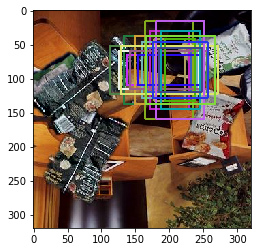

In [9]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

i = 1
img = np.copy(dps[i][0]['images'][0])
img_h, img_w = img.shape[:2]
count = 0
for anchor in anchors:
    y1, x1, y2, x2 = (anchor * [img_h, img_w, img_h, img_w]).astype(np.int32)
    col = np.random.uniform(0, 255, 3)
    thickness = 2
    if (y1 > 0) and (x1 > 0) and (y2 < img_h) and (x2 < img_w):
        count += 1
        if count > 360:
            img = cv2.rectangle(img, (x1, y1), (x2, y2), col, thickness)
    if count > 378:
        break
plt.imshow(img)

6


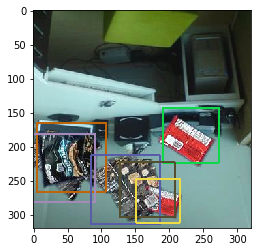

In [13]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

i = 5
img = np.copy(dps[i][0]['images'][0])
weights = dps[i][1]['weights'][0]
classes = dps[i][1]['classes'][0]
img_h, img_w = img.shape[:2]
count = 0
for anchor, weight, class_ in zip(anchors, weights, classes):
    y1, x1, y2, x2 = (anchor * [img_h, img_w, img_h, img_w]).astype(np.int32)
    #if (y1 > 0) and (x1 > 0) and (y2 < img_h) and (x2 < img_w): 
    col = np.random.uniform(0, 255, 3)
    thickness = np.random.randint(2, 3)
    if (weight > 0) and (class_ > 0):
        count += 1
        img = cv2.rectangle(img, (x1, y1), (x2, y2), col, thickness)

plt.imshow(img)
print(count)

In [16]:
64 * 1.8

115.2

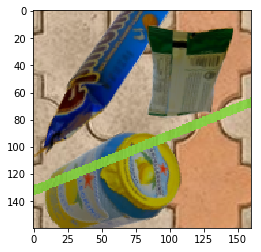

In [6]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

img = dps[0][0]['images'][0]
plt.imshow(img)

In [8]:
dps[0][1]['weights'][0]

array([0., 0., 0., ..., 1., 1., 0.], dtype=float32)

In [6]:
np.where(dps[0][1]['classes'][0] > 0)[0]

array([1369, 1432])

In [7]:
dps[0][1]['regs'][0][1276]

array([3.8889325 , 0.29190063, 2.8768454 , 1.454011  ], dtype=float32)

In [13]:
bbox_classes = dps[0][1]['bboxes']['classes'][0]
tf.expand_dims(bbox_classes, axis=0).shape

TensorShape([Dimension(1), Dimension(1500)])

In [11]:
20*20*3 + 10*10*3

1500

In [12]:
bbox_classes = dps[0][1]['bboxes']['weights'][0]
bbox_classes.shape

(1500,)

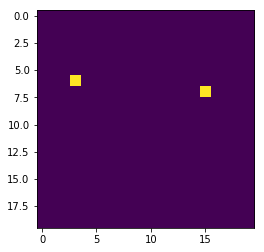

In [12]:
bbox_weights = dps[0][1]['bboxes']['weights'][0][:1200]
bbox_classes = dps[0][1]['bboxes']['classes'][0][:1200]
bbox_classes = bbox_classes.reshape([20, 20, 3])[:, :, 1]
bbox_weights = bbox_weights.reshape([20, 20, 3])[:, :, 1]
plt.imshow(bbox_classes * bbox_weights)

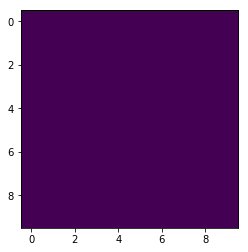

In [13]:
bbox_weights = dps[2][1]['bboxes']['feat_2']['weights'][0]
bbox_classes = dps[2][1]['bboxes']['feat_2']['classes'][0]
bbox_classes = bbox_classes.reshape([10, 10, 3])[:, :, 0]
bbox_weights = bbox_weights.reshape([10, 10, 3])[:, :, 0]
plt.imshow(bbox_classes * bbox_weights)

In [ ]:
bbox_weights = dps[0][1]['bboxes']['feat_2']['weights'][0]


In [18]:
bbox_regs = dps[1][1]['bboxes']['feat_1']['regs'][0]
bbox_regs[bbox_regs[:, 2] - bbox_regs[:, 0] > 0]

array([[0.54014605, 0.2080292 , 0.9726278 , 0.7080292 ]], dtype=float32)

In [22]:
np.repeat(np.expand_dims(np.arange(8), 1), 9, axis=0).flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7,
       7, 7, 7, 7, 7, 7])

In [17]:
labels['heatmaps'][0].nonzero()

(array([ 4,  4,  4,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  7,  7,
         7, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14,
        14, 14, 18, 18, 18, 19, 19, 19, 20, 20, 20]),
 array([17, 18, 19, 14, 15, 16, 17, 18, 19, 14, 15, 16, 17, 18, 19, 14, 15,
        16, 17, 18, 19, 17, 18, 19, 37, 38, 39, 17, 18, 19, 37, 38, 39, 37,
        38, 39, 37, 38, 39, 37, 38, 39, 37, 38, 39]),
 array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1]))

In [15]:
labels['vecmaps'][0].nonzero()

(array([ 4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7, 11, 11, 11,
        11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 18, 18, 18, 18,
        18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19,
        19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]),
 array([17, 17, 18, 18, 19, 19, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17,
        18, 18, 19, 19, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17,
        18, 19, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 18,
        18, 19, 19, 17, 17, 18, 18, 19, 19, 37, 37, 38, 39, 39, 17, 17, 18,
        18, 19, 19, 37, 37, 38, 39, 39, 37, 37, 38, 39, 39, 37, 37, 37, 37,
        38, 38, 38, 39, 39, 39, 39, 39, 39, 37, 37, 37, 38, 38, 39, 39, 39,
        39, 37, 37, 37

In [14]:
116/4

29.0

In [7]:
labels['vecmaps'][0][8, 30, 7]

7.0

In [7]:
pairs

[[0, 1], [1, 2]]

In [11]:
for i, (kp1, kp2) in enumerate(pairs):
    print(i, kp1, kp2)

0 0 1
1 1 2


0 1 ***************************
-2.0 -6.0
-3.0 -6.0
-4.0 -6.0
-2.0 -7.0
-3.0 -7.0
-4.0 -7.0
-2.0 -8.0
-3.0 -8.0
-4.0 -8.0
-1.0 -5.0
-2.0 -5.0
-3.0 -5.0
-1.0 -6.0
-2.0 -6.0
-3.0 -6.0
-1.0 -7.0
-2.0 -7.0
-3.0 -7.0
2 1 ***************************
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
3.0 -6.0
2.0 -6.0
1.0 -6.0
3.0 -7.0
2.0 -7.0
1.0 -7.0
3.0 -8.0
2.0 -8.0
1.0 -8.0
0.0 -8.0
-1.0 -8.0
-2.0 -8.0
0.0 -9.0
-1.0 -9.0
-2.0 -9.0
0.0 -10.0
-1.0 -10.0
-2.0 -10.0
8.0 -7.0
7.0 -7.0
6.0 -7.0
8.0 -8.0
7.0 -8.0
6.0 -8.0
8.0 -9.0
7.0 -9.0
6.0 -9.0
0 1 ***************************
4.0 1.0
3.0 1.0
2.0 1.0
4.0 0.0
3.0 0.0
2.0 0.0
4.0 -1.0
3.0 -1.0
2.0 -1.0
-1.0 -5.0
-2.0 -5.0
-3.0 -5.0
-1.0 -6.0
-2.0 -6.0
-3.0 -6.0
-1.0 -7.0
-2.0 -7.0
-3.0 -7.0
2 1 ***************************
2.0 -10.0
1.0 -10.0
0.0 -10.0
2.0 -11.0
1.0 -11.0
0.0 -11.0
2.0 -12.0
1.0 -12.0
0.0 -12.0
0 1 ***************************
4.0 2.0
3.0 2.0
2.0 2.0
4.0 1.0
3.0 1.0
2.0 1.0
4.0 0.0
3.0 0.0
2.0 0.0
2 1 *****

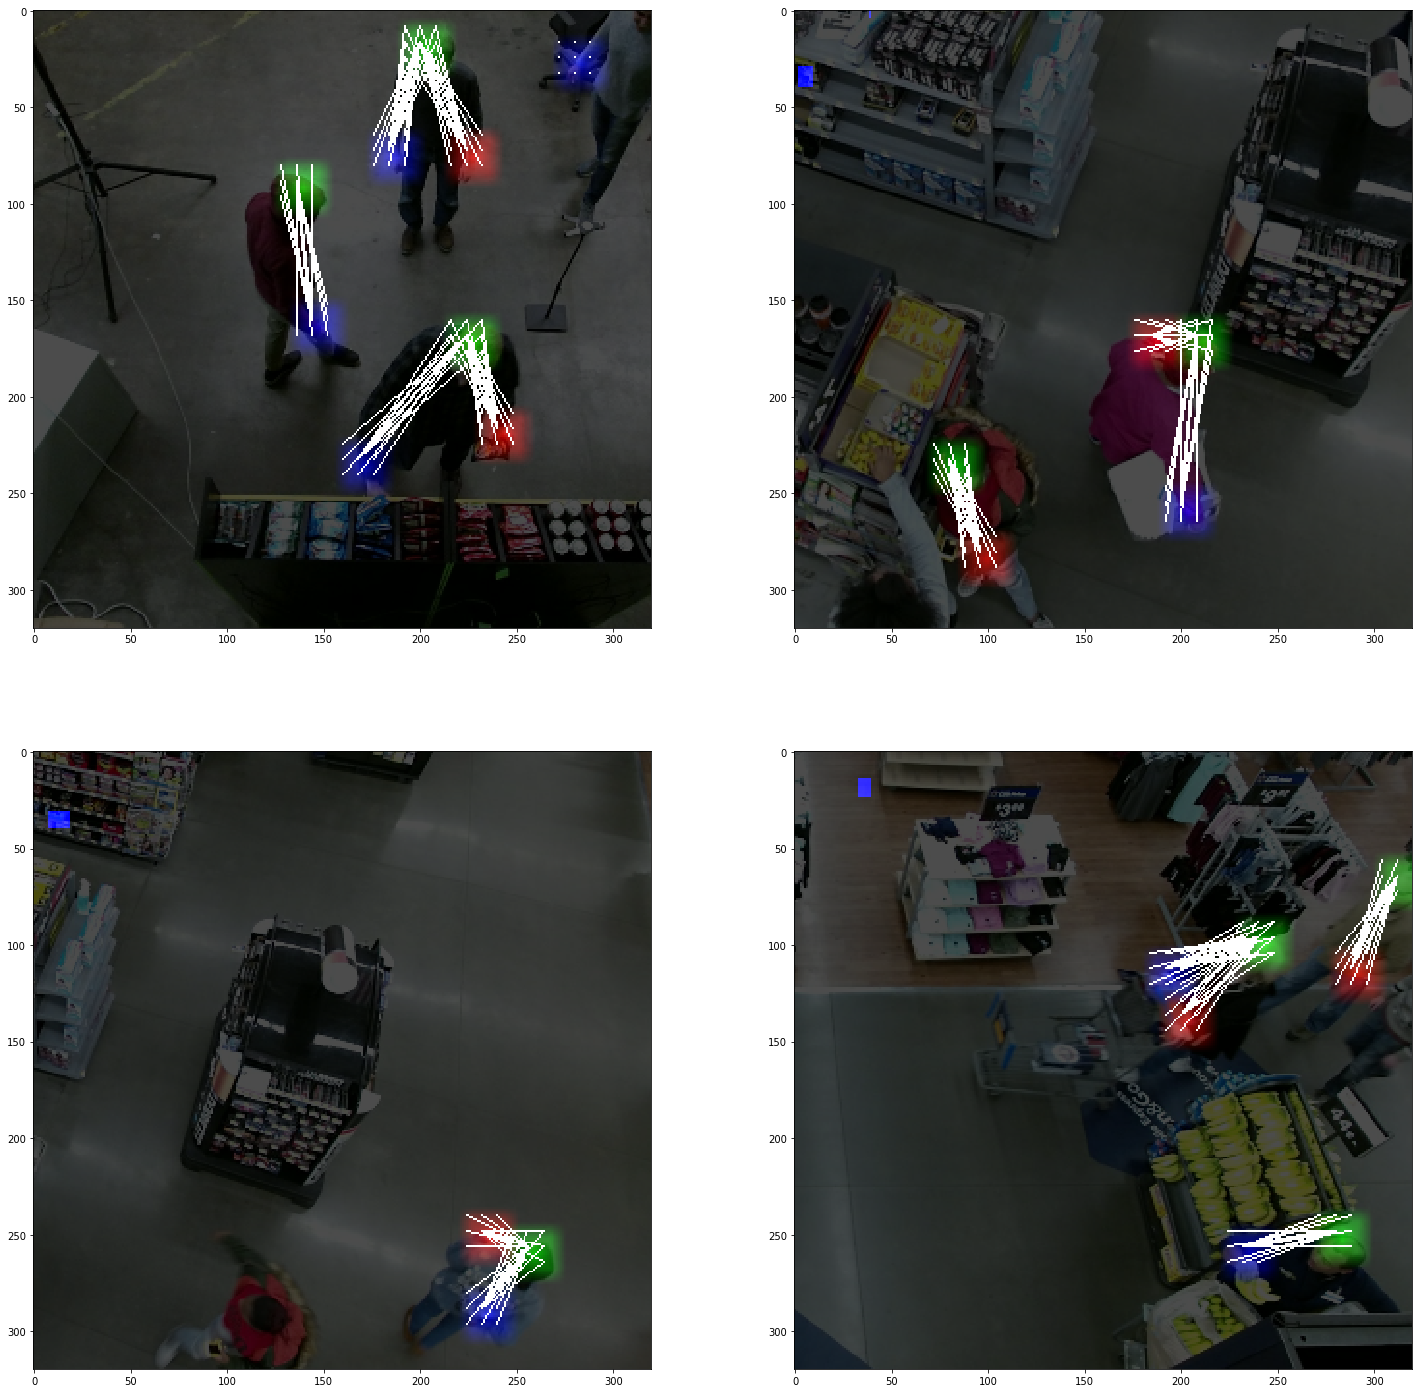

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

fig, axes = plt.subplots(2, 2, figsize=(25, 25))

for i, ax in enumerate(axes.flatten()):
    features, labels = dps[i]
    img = features['images'][0].astype(np.uint8)
    #     kp = np.zeros((40, 40, 3), dtype=np.uint8)
    #     kp[:, :, 0] = (255. * labels['heatmaps'][0][:, :, 0]).astype(np.uint8)
    #     kp[:, :, 1] = (255. * labels['heatmaps'][0][:, :, 1]).astype(np.uint8)
    kp = (255. * labels['heatmaps'][0]).astype(np.uint8)
    kp = cv2.resize(kp, (320, 320))
    img = cv2.addWeighted(img, 0.3, kp, .7, 0)
    vecmaps = labels['vecmaps'][0]
    pairs = [[0, 1], [2, 1]]
    heatmaps = labels['heatmaps'][0]
    scale_h, scale_w = 8, 8
    for i, (kp1, kp2) in enumerate(pairs):
        print(kp1, kp2, "***************************")
        y_indices_1, x_indices_1 = heatmaps[:, :, kp1].nonzero()
        for x, y in zip(x_indices_1, y_indices_1):
            x0, y0 = scale_w * x, scale_h * y
            delta_x = scale_w * int(vecmaps[y, x, 4 * i])
            delta_y = scale_h * int(vecmaps[y, x, 4 * i + 1])
            print(vecmaps[y, x, 4 * i], vecmaps[y, x, 4 * i + 1])
            img = cv2.line(img, (x0, y0),
                          (x0 + delta_x, y0 + delta_y),
                          (255, 255, 255), 1)
        y_indices_2, x_indices_2 = heatmaps[:, :, kp2].nonzero()
        for x, y in zip(x_indices_2, y_indices_2):
            x0, y0 = scale_w * x, scale_h * y
            delta_x = scale_w * int(vecmaps[y, x, 4 * i + 2])
            delta_y = scale_h * int(vecmaps[y, x, 4 * i + 3])
            # print(vecmaps[x, y, 4 * i + 2], vecmaps[x, y, 4 * i + 3])
            img = cv2.line(img, (x0, y0),
                          (x0 + delta_x, y0 + delta_y),
                          (255, 255, 255), 1)
    mask = np.where(labels['masks'][0] == 0)
    img[mask[0], mask[1], 2] = 255 
    ax.imshow(img)

In [13]:
{k: v for k, v in train_cfg.__dict__.items() if isinstance(v, (int, float, list, tuple, str
                                                               , ))}

{'batch_size': 2,
 'filenames_shuffle_buffer_size': 100,
 'is_training': True,
 'learning_rate': 0.001,
 'model_dir': './models',
 'num_epochs': 0,
 'num_parallel_map_calls': 2,
 'num_readers': 2,
 'prefetch_size': 32,
 'read_block_length': 32,
 'shuffle': True,
 'shuffle_buffer_size': 2048,
 'train_keypoints': ['left_wrist', 'right_wrist']}

In [37]:
train_cfg.__dict__

{'augmentation': {'flip_left_right': True,
  'random_crop': True,
  'scale_range': [0.5, 2.0]},
 'batch_size': 2,
 'filenames_shuffle_buffer_size': 100,
 'is_training': True,
 'learning_rate': 0.001,
 'learning_rate_decay': {'decay_rate': 0.95, 'decay_steps': 10000},
 'model_dir': './models',
 'num_epochs': 0,
 'num_parallel_map_calls': 2,
 'num_readers': 2,
 'optimizer': {'name': 'adam',
  'params': {'beta1': 0.9, 'beta2': 0.999, 'epsilon': '1e-8'}},
 'prefetch_size': 32,
 'preprocess': {'image_resize': [320, 320]},
 'read_block_length': 32,
 'shuffle': True,
 'shuffle_buffer_size': 2048,
 'train_keypoints': ['left_wrist', 'right_wrist']}

In [4]:
data_cfg.category

{'ALMONDJOY': 'bar1',
 'Cheetos Crunchy': 'chips',
 'Clif Bar Blueberry Crisp': 'bar2',
 'Clif Bar Chocolate Brownie': 'bar2',
 'Clif Bar Chocolate Chip': 'bar2',
 'Clif Bar Crunchy Peanut Butter': 'bar2',
 'Clif Bar Oatmeal Rasin Walnut': 'bar2',
 'Coce Diet': 'can',
 'Coce classic': 'can',
 'Coce zero': 'can',
 'Doritos': 'chips',
 'Doritos Cool Ranch': 'chips',
 'Fritos': 'chips',
 'Haribo': 'bar2',
 'KIND NUTS and SPICES 1': 'bar1',
 'Karamucho': 'chips',
 'Kettle chips': 'chips',
 'La Croix Lime': 'can',
 'La Croix Orange': 'can',
 'La Croix Pure': 'can',
 'Lays Barbecue': 'chips',
 'Lays Classic': 'chips',
 'Lays Sour Cream': 'chips',
 'M&M': 'bar2',
 'Nut Thins SRIRACHA': 'chips',
 'Nutter Butter Bites': 'chips',
 'SANPELLEGRINO': 'can',
 'Sprite': 'can',
 'cheez it cheddar jack': 'chips',
 'sprite zero': 'can'}

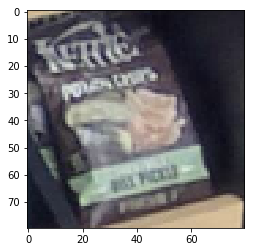

In [59]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

img = plt.imread('/home/prerit/Downloads/20180620_0000011.jpg')
img = cv2.flip(img, 1)
img = img[860:860 + 160 , 1700:1700 + 160]
img = cv2.resize(img, (80, 80), interpolation=cv2.INTER_AREA)
plt.imshow(img)

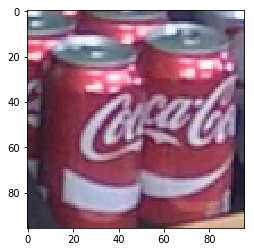

In [60]:
img = plt.imread('/home/prerit/Downloads/20180620_0000011.jpg')
img = cv2.flip(img, 1)
img = img[730:730 + 140 , 1330:1330 + 140]
img = cv2.resize(img, (96, 96), interpolation=cv2.INTER_AREA)
plt.imshow(img)

(718, 960, 3)


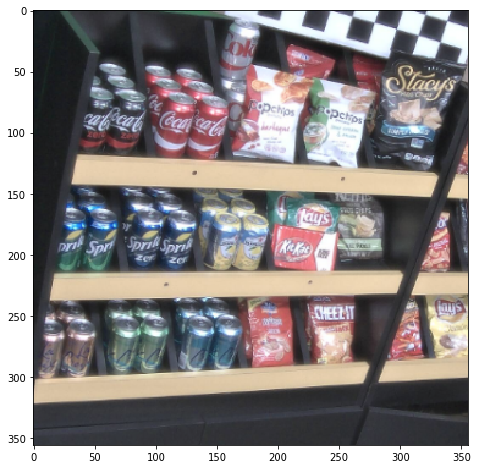

In [9]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

fig = plt.figure(figsize=(8, 8))
img = plt.imread('/home/prerit/Pictures/lab_test.png')
print(img.shape)
img = img[120:500, 140:520]
img = cv2.resize(img, (356, 356))
plt.imshow(img)

In [13]:
120/718, 500/718  # y crop

(0.1671309192200557, 0.6963788300835655)

In [15]:
140/960, 520/960  # x crop

(0.14583333333333334, 0.5416666666666666)

In [3]:
356 + 32

388